# Aviation Risk Analysis Project

## Project Overview

In the US court systems, the average compensation for a life lost in a general aviation accident is $5.2 million dollars, the highest in the world!<sup>1</sup> 

This project presents analysis of past aviation accidents based on how the aircraft was built. Our team reviews and processes the data to generate insights for Jelly Co. and ultimately provides airplane purchasing reccomendations. 


<sup>1</sup>*[Article](https://www.keystonelaw.com/keynotes/how-is-compensation-calculated-after-an-aviation-accident) written by Healy-Pratt and Hanna in 2021*

![airplane](https://storage.googleapis.com/mcp_acc_236blog/uploads/2014/11/018067-vroeg-II1-1920x1080.jpg)

<span>Photo by Andres Bolkenbaas on <a href="https://blog.klm.com/6-tips-for-creative-aviation-photography/">blog.klm.com</a></span>


## Business Problem

Jelly Co. is expanding it's business to new industries. They asked our team to look into the data for airplane accidents<sup>1</sup> within the US in the last twenty-odd years. The company wants to know:

1. Which airplane feature helps assess the lowest possible risk to the company? 
2. Which airplane manufacturer should be purchased and operated for a commercial enterprise? 
3. Which airplane manufacturer should be purchased and operated for a private enterprise? 
    


<sup>1</sup>*Here we are using the [definition](https://www.faa.gov/faq/what-constitutes-post-accident-test-what-definition-accident#:~:text=The%20FAA%20and%20the%20National,any%20person%20suffers%20death%20or) of accident: "an occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight and all such persons have disembarked, AND in which any person suffers death or serious injury or in which the aircraft receives substantial damage"*

## Data Understanding

For this project a [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) was taken from the National Transportation Safety Board that includes:

- Aviation accident data from 1962 to 2023 
- Civil aviation accidents 
- Selected incidents in the United States and international waters

The entire dataset contains 90348 records and 31 columns. Let's explore the processes done on the dataset.

1. Data Preparation
2. Data Cleaning
2. Data Visualization
3. Data Analysis

## 1. Data Preparation

In this section:
- The necessary python libraries are imported and read through
- The .head() is used to show a sample of the data we are working with

In [1]:
## Import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## Read the dataset using pandas library

df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)



## Display information for the first 5 events

pd.set_option('display.max_columns', None)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 2. Data Cleaning

Overall steps for this section:
- Check for duplicates
- Filter raw data by relevancy to business problem
- Address missing values
- Standardization of capitalization
- Keep columns necessary to answer business problem 

Check for dupliactes and drop the duplicated values if present.

In [2]:
## Print the total number of duplicates in the dataset

print(df.duplicated().sum())

1390


In [3]:
## Drop the number of duplicates in the dataset

unique_df = df.drop_duplicates(ignore_index=False)


## Verify duplicates were dropped by printing the number of duplicates in the dataset

print(unique_df.duplicated().sum())

0


Filter out the rows where the values in the _Aircraft.Category_ and 
_Purpose.of.flight_ columns are not in the specified lists Aircraft_categories and Flight_purpose.

Justifications for filtering raw data:
- Jelly Co. company is interested in Accidents over Incidents because Incidents is concerned with the operation of the aircraft whereas Accidents is concerned with the operation of the aircaraft as well as the safety of the passengers as defined by the Federal Aviation Administration and the National Transportation Safety Board.
- Our company is interested in flights within the United States.
- Our company is interested in the data after the new safety regulations were set in place by TSA in November 2001.
- Our company is interested in purchasing only airplanes.
- Our company is interested in Purpose of flight data that is related to commercial and private airplanes. 


In [4]:
## Filter dataset for Investigation Type, Country, Event Date, Aircraft category, and Purpose of flight


Aircraft_categories = ['Helicopter', 'Glider', 'Balloon', 'Gyrocraft', 'Weight-Shift', 'Powered Parachute', 
                       'Ultralight', 'WSFT', 'Powered-Lift', 'Blimp', 'ULTR', 'Rocket']
Flight_purpose = ['Instructional', 'Aerial Application', 'Positioning', 'Ferry', 'Aerial Observation', 
                  'Flight Test', 'Skydiving', 'External Load', 'Banner Tow', 'Air Race show', 'Air Race/show', 
                  'Glider Tow', 'Firefighting', 'Air Drop', 'ASHO']

unique_df = unique_df.loc[(unique_df['Investigation.Type'] == 'Accident') 
                    & (unique_df['Country'] == 'United States')
                    & (unique_df['Event.Date'] > '2001-11-01')
                    & (unique_df['Aircraft.Category'] != (unique_df['Aircraft.Category'].isin(Aircraft_categories)))
                    & (unique_df['Purpose.of.flight'] != (unique_df['Purpose.of.flight'].isin(Flight_purpose)))
                    ]

Look at columns relevant to the business problem and remove the missing values from the appropriate column(s). 


In [5]:
unique_df['Make'].value_counts()

CESSNA                        4227
Cessna                        4135
PIPER                         2487
Piper                         2266
BEECH                          874
                              ... 
TEXAS AIR VENTURES INC           1
SPANGENBERG                      1
Loranger                         1
CULP JOHN S                      1
ROGERS HOMER/ROGERS SHEILA       1
Name: Make, Length: 5179, dtype: int64

In [6]:
unique_df = unique_df.dropna(subset=['Make'])

Further clean this data by standardizing the capitalization of the string objects 
in each element of the Make column.  

In [7]:
unique_df['Make'] = unique_df['Make'].str.title()

unique_df['Make'].value_counts()

Cessna                8362
Piper                 4753
Beech                 1737
Bell                   774
Mooney                 472
                      ... 
Alexander Thomas P       1
Vermeys                  1
Claypool                 1
Henry Slosing            1
Shpakow Thomas           1
Name: Make, Length: 4705, dtype: int64

In [8]:
## Continue to clean data in Make and Purpose of flight columns

unique_df['Make'].replace(to_replace = ['Saab-Scania', 'Saab'], value = 'Saab-Scania Ab (Saab)', inplace = True)
unique_df['Make'].replace(to_replace = ['Embraer'], value = 'Embraer S A', inplace = True)
unique_df['Make'].replace(to_replace = ['Airbus'], value = 'Airbus Industrie', inplace = True)
unique_df['Make'].replace(to_replace = ['Bombardier', 'Bombardier, Inc.'], value = 'Bombardier Inc', inplace = True)
unique_df['Make'].replace(to_replace = ['Mcdonnell Douglas', 'Douglas', 'Mcdonnell Douglas Corporation'], value = 'Mcdonnell Douglas Aircraft Co', inplace = True)
unique_df['Make'].replace(to_replace = ['Beechcraft'], value = 'Beech', inplace = True)
unique_df['Make'].replace(to_replace = ['Gulfstream'], value = 'Gulfstream Aerospace', inplace = True)
unique_df['Make'].replace(to_replace = ['Embraer-Empresa Brasileira De'], value = 'Embraer S A', inplace = True)

unique_df['Purpose.of.flight'].replace(to_replace = ['PUBS'], value = 'Public Aircraft - State', inplace = True)
unique_df['Purpose.of.flight'].replace(to_replace = ['PUBL'], value = 'Public Aircraft - Local', inplace = True)

Choose which columns to keep then drop the rest of the columns.

In [9]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31281 entries, 51711 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                31281 non-null  object 
 1   Investigation.Type      31281 non-null  object 
 2   Accident.Number         31281 non-null  object 
 3   Event.Date              31281 non-null  object 
 4   Location                31274 non-null  object 
 5   Country                 31281 non-null  object 
 6   Latitude                30650 non-null  object 
 7   Longitude               30640 non-null  object 
 8   Airport.Code            21217 non-null  object 
 9   Airport.Name            21404 non-null  object 
 10  Injury.Severity         31229 non-null  object 
 11  Aircraft.damage         30734 non-null  object 
 12  Aircraft.Category       23880 non-null  object 
 13  Registration.Number     31279 non-null  object 
 14  Make                    31281 non-

In [10]:
dropped_columns = ['Injury.Severity', 'Registration.Number', 'Amateur.Built', 'FAR.Description', 
                   'Schedule', 'Air.carrier', 'Weather.Condition', 'Report.Status', 'Publication.Date', 
                   'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 
                   'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name']

for column in dropped_columns:
    unique_df = unique_df.drop(column, axis=1)
    
unique_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Broad.phase.of.flight
51711,20011120X02265,Accident,SEA02LA010,2001-11-02,"ONTARIO, OR",United States,Substantial,NaN,Fetherolf,Hatz CB-1,1.0,Reciprocating,Personal,Landing
51712,20011114X02238,Accident,NYC02LA024,2001-11-02,"ARGYLE, NY",United States,Substantial,NaN,Cessna,172D,1.0,Reciprocating,Personal,Maneuvering
51713,20011106X02198,Accident,CHI02LA018,2001-11-02,"PEORIA, IL",United States,Substantial,NaN,Piper,PA-28R-201T,1.0,Reciprocating,Personal,Landing
51715,20011125X02293,Accident,NYC02LA031,2001-11-03,"NORTH LIMA, OH",United States,Substantial,NaN,Maule,M7-260,1.0,Reciprocating,Personal,Landing
51716,20011228X02462,Accident,NYC02LA021,2001-11-03,"ROANOKE, VA",United States,Substantial,NaN,Piper,PA-22-108,1.0,Reciprocating,Personal,Climb


## 2. Data Visualization

 Create visuals that compare:
 - The number of engines to the total accident count 
 - The engine type to the total accident count 
 - The broad phase of flight to the total accident count
 

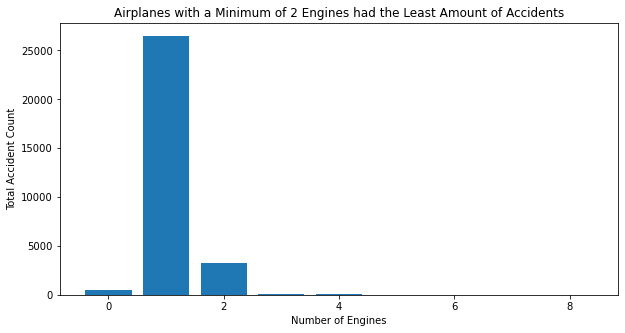

In [11]:
unique_df['Number.of.Engines'].value_counts().sort_index()

## Plotting data

fig, ax = plt.subplots(figsize=(10,5))

x = unique_df['Number.of.Engines'].value_counts().index
y = unique_df['Number.of.Engines'].value_counts().values

ax.bar(x,y)
ax.set_title('Airplanes with a Minimum of 2 Engines had the Least Amount of Accidents')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Total Accident Count');

The number of engines to the total accident count comparison shows that airplanes with a __minimum of 2 engines__ had the __least__ amount of accidents.

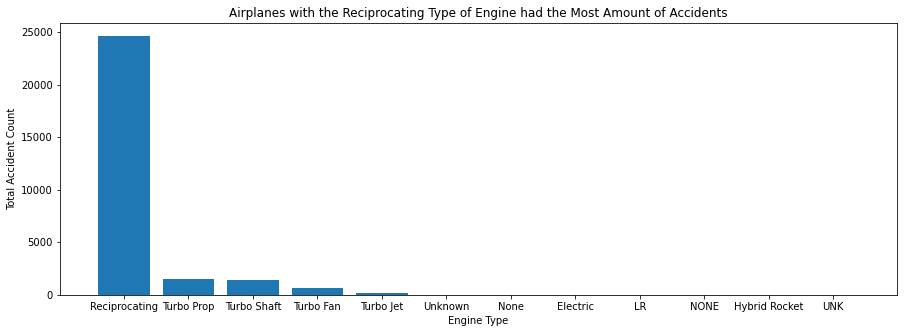

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
x = unique_df['Engine.Type'].value_counts().index
y = unique_df['Engine.Type'].value_counts().values
ax.bar(x,y)
ax.set_title('Airplanes with the Reciprocating Type of Engine had the Most Amount of Accidents')
ax.set_xlabel('Engine Type')

ax.set_ylabel('Total Accident Count');

The engine type to the total accident count comparison shows that airplanes with the __reciprocating type of engine__ had the __most__ amount of accidents.

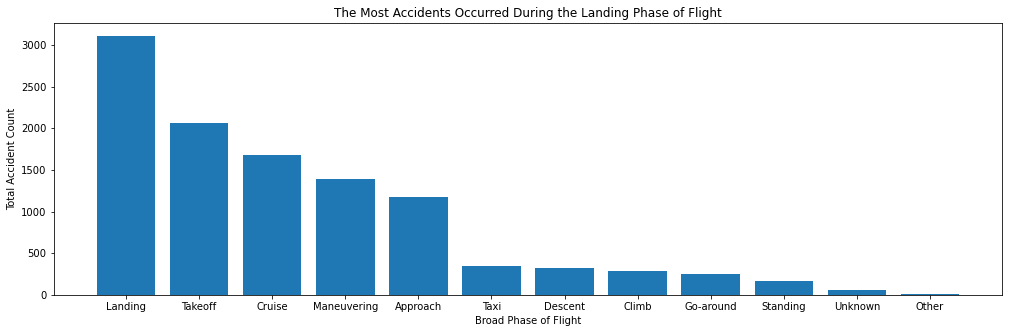

In [13]:
fig, ax = plt.subplots(figsize=(17,5))

x = unique_df['Broad.phase.of.flight'].value_counts().index
y = unique_df['Broad.phase.of.flight'].value_counts().values

ax.bar(x,y)
ax.set_title('The Most Accidents Occurred During the Landing Phase of Flight')
ax.set_xlabel('Broad Phase of Flight')
ax.set_ylabel('Total Accident Count');

The broad phase of flight to the total accident count shows that the __most__ accidents occurred during the __landing phase of flight__.

## 3. Data Analysis

- Commercial airplane analysis
- Private airplane analysis

### Commercial Analysis

Data analysis for commercial airplanes that have the least amount of accidents.

- We chose 2.0 engines as per the data in the bar graph "Airplanes with a minimum of 3 engines had the least amount of accidents".

- We focused on data from Boeing and Airbus because they are among the top 10 largest commercial aircraft manufacturers according to the [article](https://www.aerotime.aero/articles/top-10-largest-aircraft-manufacturers-in-the-world) written by Rosita Mickeviciute in 2023. 

In [14]:
filtered_public_df = unique_df.loc[(unique_df['Number.of.Engines'] > 2.0)
           & (unique_df['Engine.Type'] != 'Reciprocating')
           & (unique_df['Purpose.of.flight'] != 'Personal')
           & (unique_df['Purpose.of.flight'] != 'Business')
           & (unique_df['Purpose.of.flight'] != 'Other Work Use')
           & (unique_df['Purpose.of.flight'] != 'Executive/corporate')
           & (unique_df['Broad.phase.of.flight'] != 'Landing')
           ]

In [15]:
final_public_df = filtered_public_df.loc[(filtered_public_df['Make'] == 'Boeing')
                       |(filtered_public_df['Make'] == 'Airbus Industrie')
                        ]

In [16]:
final_public_df[['Make', 'Number.of.Engines']].value_counts().head(50)  

Make              Number.of.Engines
Boeing            4.0                  18
                  3.0                  10
Airbus Industrie  4.0                   3
dtype: int64

### Private Analysis

Data analysis for private airplanes that have the least amount of accidents.

- Investigate if there is a correalation between number of engines and engine type
- We chose 1.0 engine as per the data in the bar graph "Airplanes with the Reciprocating type of engine had the most amount of accidents" and the data from "Num_of_engines_and_Engine_type".

- We focused on data from Beech, Cessna, Bombardier Inc, and Gulfstream Aerospace because they are among the top 10 largest private aircraft manufacturers according to the [article](https://www.aerotime.aero/articles/top-10-most-popular-private-jet-models-of-2023) written by Rosita Mickeviciute in 2023. 

In [17]:
Num_of_engines_and_Engine_type = unique_df[['Number.of.Engines', 'Engine.Type']].value_counts()
Num_of_engines_and_Engine_type

## Airplanes that used Reciproating engine types and ran on single engines 
## had the most amount of accidents

Number.of.Engines  Engine.Type  
1.0                Reciprocating    22650
2.0                Reciprocating     1616
1.0                Turbo Shaft       1192
                   Turbo Prop         955
2.0                Turbo Fan          594
                   Turbo Prop         490
                   Turbo Shaft        183
                   Turbo Jet          104
1.0                Turbo Jet           61
3.0                Turbo Fan           26
4.0                Turbo Fan           20
1.0                Turbo Fan           19
                   Unknown             16
4.0                Reciprocating       13
0.0                None                 8
1.0                None                 5
3.0                Turbo Jet            5
2.0                Unknown              4
1.0                Electric             4
4.0                Turbo Prop           4
0.0                Unknown              3
8.0                LR                   2
4.0                Electric             2
 

In [18]:
filtered_private_df = unique_df.loc[(unique_df['Number.of.Engines'] > 1.0)
           & (unique_df['Engine.Type'] != 'Reciprocating')
           & (unique_df['Purpose.of.flight'] != 'Public Aircraft')
           & (unique_df['Purpose.of.flight'] != 'Public Aircraft - Federal')
           & (unique_df['Purpose.of.flight'] != 'Public Aircraft - State')
           & (unique_df['Purpose.of.flight'] != 'Public Aircraft - Local')
           & (unique_df['Broad.phase.of.flight'] != 'Landing')
           ]

In [19]:
final_private_df = filtered_private_df.loc[(filtered_private_df['Make'] == 'Beech')
                                           |(filtered_private_df['Make'] == 'Cessna')
                                           |(filtered_private_df['Make'] == 'Bombardier Inc')
                                           |(filtered_private_df['Make'] == 'Gulfstream Aerospace')
                                          ]



In [20]:
final_private_df[['Make', 'Number.of.Engines']].value_counts()


Make                  Number.of.Engines
Beech                 2.0                  201
Cessna                2.0                  161
Bombardier Inc        2.0                   67
Gulfstream Aerospace  2.0                   16
dtype: int64

## Conclusions

- Any skepticism in our data is mainly due to the lack of non-incident/accident flight reports.

- Airplanes that used reciproating engine types and ran on single engines had the most amount of accidents. 


- Among the top performing commercial airplane manufacturers Airbus Industries had the lowest amount of accidents.


- Among the top performing private airplane manufacturers Gulfstream Aerospace had the lowest amount of accidents.



- The following recommendations would yield the lowest risk to Jelly Co.


 #### Purchasing Recommendation For Commercial Airplanes:

1. Make: __Airbus__      
2. Number of Engines: __4.0__   


 #### Purchasing Recommendation For Private Airplanes:

1. Make: __Gulfstream Aerospace__  
2. Number of Engines: __2.0__ 

_Next Steps_

Going forward, our team can request to perform a financial metric analysis in order to recommend the most cost effective airplane model.



Our team can also request Jelly Co.’s aircraft selection requirements (e.g., passenger capacity and minimum mileage) to provide specific model recommendations.